This Notebook visualise relationships between *numeric internal and external features* and **rent** by scatter plot as well as calculated pearson correlation. It makes use of linear regression to do the step-wise regrssion.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model

In [2]:
# Read dataset from preprocessed to df
df = pd.read_csv('cleaned_df.csv')
# Discard irrelevant columns and rename columns
df = df.drop(columns=['Unnamed: 0.1', 'index', 'Unnamed: 0','price_label']).rename(columns={'train_station(m)':'train_station_distance','CBD(m)':'CBD_distance','cost_text':'rent'})
df

,name,postcode,property_type,bedrooms,bathrooms,parking,schools,rent,train_station_distance,CBD_distance,population2022,population2023,population2024,population2025,income2022,income2023,income2024,income2025
0,Room 6/8 Melwood Court Meadow Heights VIC 3048,3048,Apartment / Unit / Flat,1,1,0,0.3,130.000000,2131.1,19150.7,17364.0,16549.0,15773.0,15034.0,86498,88316,90176,92078
1,30 Daly Boulevard Highton VIC 3216,3216,House,9,2,2,2.0,130.000000,2904.1,85109.1,59229.0,60753.0,62377.0,64109.0,184195,192855,201927,211432
2,62 Reserve Rd Grovedale VIC 3216,3216,House,1,2,2,1.0,140.000000,1809.3,87665.1,59229.0,60753.0,62377.0,64109.0,184195,192855,201927,211432
3,1/57 Wanda Road Caulfield North VIC 3161,3161,House,1,1,0,0.6,140.000000,1432.7,9784.5,10418.0,10185.0,9957.0,9734.0,56454,58176,59951,61780
4,Room 2/31 Stanley Street Frankston VIC 3199,3199,House,1,1,1,1.1,145.000000,916.1,53197.1,60500.0,59711.0,58932.0,58164.0,176387,182176,188161,194348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,4203/35 Spring St Melbourne VIC 3004,3004,Apartment / Unit / Flat,3,2,4,1.4,1038.461538,358.8,1621.2,8538.0,8166.0,7812.0,7473.0,82000,78618,76292,74826
6602,3502/14-16 The Esplanade St Kilda VIC 3182,3182,Apartment / Unit / Flat,3,3,3,0.8,1153.846154,1923.6,7936.4,27813.0,26448.0,25151.0,23917.0,61492,63821,66238,68747
6603,9 Lansdowne Street Blairgowrie VIC 3942,3942,House,3,2,3,3.3,1153.846154,43496.1,106670.1,2104.0,2128.0,2152.0,2177.0,44616,45495,46391,47305
6604,901 & 902/85 Market Street South Melbourne VIC...,3205,Apartment / Unit / Flat,3,3,1,0.3,1384.615385,4576.3,30462.2,3182.0,3085.0,2990.0,2899.0,70585,72357,74173,76035


In [3]:
# identify numeric feature columns
numeric_col = ['bedrooms', 'bathrooms', 'parking',
       'schools', 'train_station_distance', 'CBD_distance',
       'population2022', 'population2023', 'population2024', 'population2025',
       'income2022', 'income2023', 'income2024', 'income2025']

categorical_col = ['postcode', 'property_type']

14

Firstly, we draw some scatter plots to gain a rough understanding of relationships between `rent` and other features.

Text(0.5, 1.0, 'property_type vs. rent')

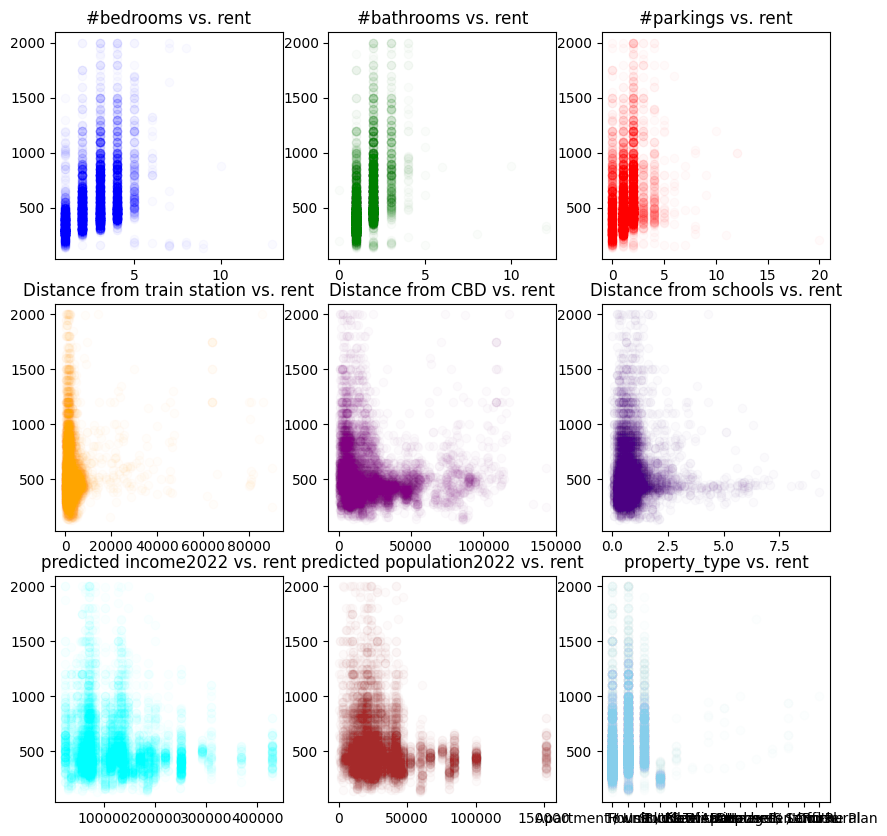

In [55]:
alpha = 0.02
plt.figure(figsize=(10,10))

plt.subplot(331)
plt.scatter(df['bedrooms'],df.rent,color ='blue',alpha=alpha)
plt.title('#bedrooms vs. rent')

plt.subplot(332)
plt.scatter(df['bathrooms'],df.rent,color = 'green',alpha=alpha)
plt.title('#bathrooms vs. rent')

plt.subplot(333)
plt.scatter(df['parking'],df.rent,color = 'red',alpha=alpha)
plt.title('#parkings vs. rent')

plt.subplot(334)
plt.scatter(df['train_station_distance'],df.rent,color = 'orange',alpha=alpha)
plt.title('Distance from train station vs. rent')

plt.subplot(335)
plt.scatter(df['CBD_distance'],df.rent,color = 'purple',alpha=alpha)
plt.title('Distance from CBD vs. rent')

plt.subplot(336)
plt.scatter(df['schools'],df.rent,color = 'indigo',alpha=alpha)
plt.title('Distance from schools vs. rent')

plt.subplot(337)
plt.scatter(df['income2022'],df.rent,color = 'cyan',alpha=alpha)
plt.title('predicted income2022 vs. rent')

plt.subplot(338)
plt.scatter(df['population2022'],df.rent,color = 'brown',alpha=alpha)
plt.title('predicted population2022 vs. rent')

plt.subplot(339)
plt.scatter(df['property_type'],df.rent,color = 'skyblue',alpha=alpha)
plt.title('property_type vs. rent')


We can see from scatter plots in the first row that number of `bedroom`, `bathrooms` and `parkings` are ordinal variables. It is worth noting as the number of facilities increase, lower boundaries of rent increase significantly. Whereas the upper limit appear to have less significant increase.

There seems to be hardly any linear correlation between numeric features and rent, we can take a log and see if it helps.

Text(0.5, 1.0, 'property_type vs. rent')

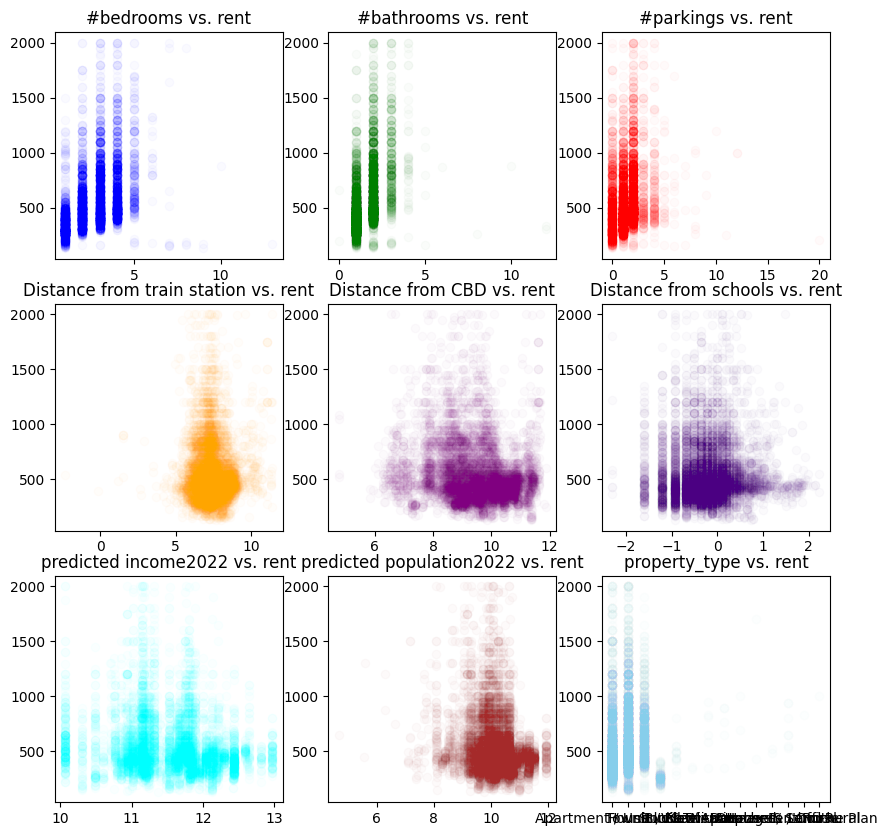

In [18]:
alpha = 0.02
# Add 0.1 to avoid 0 for log 
LOG_VALID = 0.1
plt.figure(figsize=(10,10))

plt.subplot(331)
plt.scatter(df['bedrooms'],df.rent,color ='blue',alpha=alpha)
plt.title('#bedrooms vs. rent')

plt.subplot(332)
plt.scatter(df['bathrooms'],df.rent,color = 'green',alpha=alpha)
plt.title('#bathrooms vs. rent')

plt.subplot(333)
plt.scatter(df['parking'],df.rent,color = 'red',alpha=alpha)
plt.title('#parkings vs. rent')

#
plt.subplot(334)
plt.scatter(np.log(df['train_station_distance']+LOG_VALID),df.rent,color = 'orange',alpha=alpha)
plt.title('Distance from train station vs. rent')

plt.subplot(335)
plt.scatter(np.log(df['CBD_distance']+LOG_VALID),df.rent,color = 'purple',alpha=alpha)
plt.title('Distance from CBD vs. rent')

plt.subplot(336)
plt.scatter(np.log(df['schools']+LOG_VALID),df.rent,color = 'indigo',alpha=alpha)
plt.title('Distance from schools vs. rent')

plt.subplot(337)
plt.scatter(np.log(df['income2022']+LOG_VALID),df.rent,color = 'cyan',alpha=alpha)
plt.title('predicted income2022 vs. rent')

plt.subplot(338)
plt.scatter(np.log(df['population2022']+LOG_VALID),df.rent,color = 'brown',alpha=alpha)
plt.title('predicted population2022 vs. rent')

plt.subplot(339)
plt.scatter(df['property_type'],df.rent,color = 'skyblue',alpha=alpha)
plt.title('property_type vs. rent')


log does not help much. To double check the linealarity , Lets's calculate the pearson correlation between `rent` and other features


In [65]:
corr_dict=dict()
for i in numeric_col:
    corr_dict[i] = df[i].corr(df['rent'])

dict(sorted(corr_dict.items(), key=lambda item: np.abs(item[1]),reverse=True))

{'bathrooms': 0.4598141680384162,
 'bedrooms': 0.42008904924219354,
 'parking': 0.2220591415977699,
 'population2024': -0.18846974417215406,
 'population2025': -0.1882070198371425,
 'population2023': -0.18796677975354625,
 'population2022': -0.18658795245915522,
 'income2023': -0.15988168770148392,
 'income2022': -0.15987851815515147,
 'income2024': -0.15940118391999042,
 'income2025': -0.15846222168064517,
 'CBD_distance': -0.10629345233836826,
 'train_station_distance': 0.08931865554979694,
 'schools': -0.0036236458006096736}

Above is the rank of absolute value of Pearson correlation between rent and numeric features. We can see rather strong linear correlation between rent and the number of rooms, especially bathrooms and bedrooms. Distance to the closest school posses the weakest linear relationship with rent. Below is the heatmap which visualise the correlation.

<AxesSubplot:>

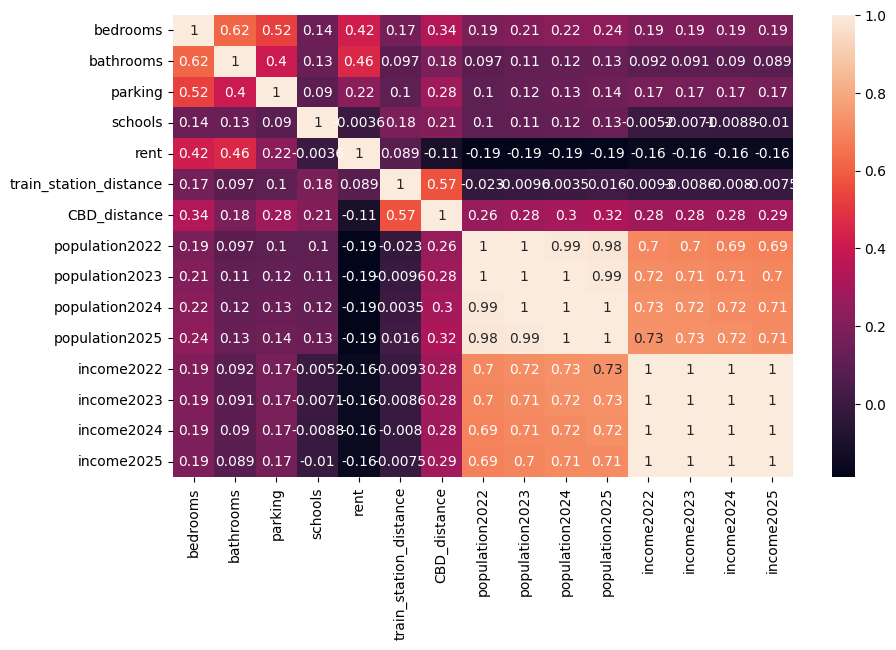

In [10]:
cor = df[['bedrooms', 'bathrooms', 'parking',
       'schools','rent', 'train_station_distance', 'CBD_distance',
       'population2022', 'population2023', 'population2024', 'population2025',
       'income2022', 'income2023', 'income2024', 'income2025']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)